In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_excel('Global Superstore.xls')

In [4]:
df.size

1230960

In [5]:
df.ndim

2

In [6]:
df.shape

(51290, 24)

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [8]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [10]:
df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [11]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [12]:
df['Postal Code']

0        10024.0
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8        95823.0
9        28027.0
10       22304.0
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16       42420.0
17           NaN
18           NaN
19           NaN
20           NaN
21       60610.0
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28       90008.0
29           NaN
          ...   
51260    83301.0
51261        NaN
51262        NaN
51263        NaN
51264        NaN
51265        NaN
51266        NaN
51267        NaN
51268    10024.0
51269    72209.0
51270    98103.0
51271        NaN
51272        NaN
51273        NaN
51274        NaN
51275        NaN
51276    77506.0
51277    92037.0
51278        NaN
51279        NaN
51280        NaN
51281        NaN
51282        NaN
51283        NaN
51284        NaN
51285        NaN
51286    77095.0
51287    93030

In [23]:
mode_postalcode= df[df['Postal Code'].notnull()]['Postal Code'].mode()[0]
df['Postal Code'].fillna(mode_postalcode,inplace=True)

In [37]:
df_cat = df.select_dtypes(include=["object"])
df_num=df.select_dtypes(include=[np.number])

In [27]:
#wrangling is completed

In [44]:
df_num.corr()['Sales']

Row ID          -0.043889
Postal Code     -0.021512
Sales            1.000000
Quantity         0.313577
Discount        -0.086722
Profit           0.484918
Shipping Cost    0.768073
Name: Sales, dtype: float64

In [53]:
df1_num=df_num[['Sales','Profit','Shipping Cost','Quantity']]

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2_cat=df_cat.apply(le.fit_transform)
df2_num=df1_num.apply(le.fit_transform)

In [55]:
df=pd.concat([df2_cat,df2_num],axis=1)

In [56]:
df.shape

(51290, 19)

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel('Global Superstore.xls')
mode_postalcode= df[df['Postal Code'].notnull()]['Postal Code'].mode()[0]
df['Postal Code'].fillna(mode_postalcode,inplace=True)
df_cat = df.select_dtypes(include=["object",'datetime64[ns]'])
df_num=df.select_dtypes(include=[np.number])
df1_num=df_num[['Sales','Profit','Shipping Cost','Quantity']]
df1_cat = df_cat
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2_cat=df1_cat.apply(le.fit_transform)
df2_num=df1_num.apply(le.fit_transform)
df=pd.concat([df2_cat,df2_num],axis=1)
df.shape

(51290, 21)

In [60]:
df2_cat.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Order Priority'],
      dtype='object')

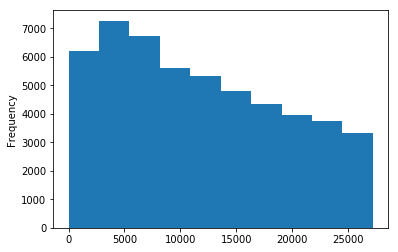

In [62]:
df.Sales.plot(kind='hist')

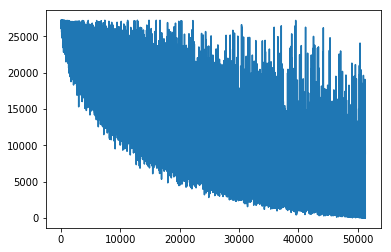

In [63]:
df.Sales.plot(kind='line')

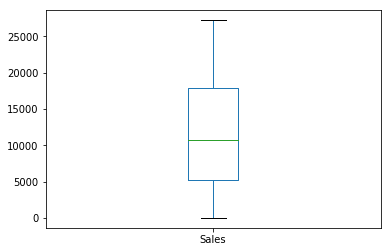

In [64]:
df.Sales.plot(kind='box')

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel('Global Superstore.xls')
mode_postalcode= df[df['Postal Code'].notnull()]['Postal Code'].mode()[0]
df['Postal Code'].fillna(mode_postalcode,inplace=True)
df_cat = df.select_dtypes(include=["object",'datetime64[ns]'])
df_num=df.select_dtypes(include=[np.number])
df1_num=df_num[['Sales','Profit','Shipping Cost','Quantity']]
df1_cat = df_cat
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2_cat=df1_cat.apply(le.fit_transform)
df2_num=df1_num.apply(le.fit_transform)
df=pd.concat([df2_cat,df2_num],axis=1)
from sklearn.model_selection import train_test_split
X1=df.drop(['Sales'],axis=1)
y=df["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3)
from sklearn.linear_model import LinearRegression
Linreg=LinearRegression()
from sklearn.tree import DecisionTreeRegressor
DecTree=DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
RandFor=RandomForestRegressor()
from sklearn.ensemble import GradientBoostingRegressor
GBM=GradientBoostingRegressor()
LM=Linreg.fit(X_train,y_train)
dt_M=DecTree.fit(X_train,y_train)
rf_M=RandFor.fit(X_train,y_train)
gb_M=GBM.fit(X_train,y_train)
scores = {"gb":gb_M.score(X_train,y_train),
          'rf':rf_M.score(X_train,y_train),
          "linear":LM.score(X_train,y_train),
          "dt":dt_M.score(X_train,y_train)}
gb_y_pred = gb_M.predict(X_test)
rf_y_pred = rf_M.predict(X_test)
lm_y_pred = LM.predict(X_test)
dtm_y_pred = dt_M.predict(X_test)

from sklearn.metrics import  r2_score
r2scores={"gb": r2_score(y_test,gb_y_pred),
          "rf": r2_score(y_test,rf_y_pred),
          "linear": r2_score(y_test,lm_y_pred),
          "dt": r2_score(y_test,dtm_y_pred)
         }
df3=pd.DataFrame({"scores":scores,"r2scores":r2scores})
df3

,scores,r2scores
dt,1.000000,0.887468
gb,0.947306,0.943648
linear,0.875684,0.871904
rf,0.989410,0.939274


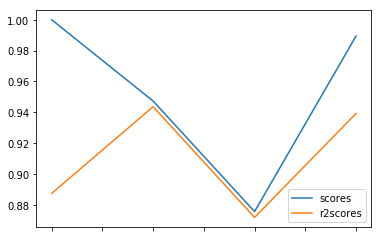

In [73]:
df3.plot()

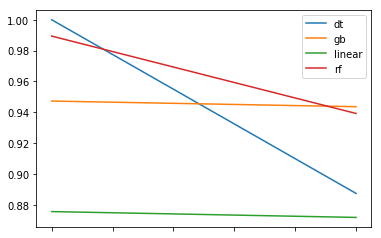

In [75]:
df3.transpose().plot()

In [76]:
df3

,scores,r2scores
dt,1.000000,0.887468
gb,0.947306,0.943648
linear,0.875684,0.871904
rf,0.989410,0.939274


In [77]:
df3.index

Index(['dt', 'gb', 'linear', 'rf'], dtype='object')

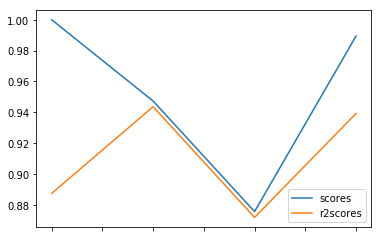

In [78]:
df3.plot()

In [79]:
df3.index

Index(['dt', 'gb', 'linear', 'rf'], dtype='object')